<a href="https://colab.research.google.com/github/SaiDheeraj69/pyt/blob/main/Thyroid_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1: DATA COLLECTION**

**Import Header Files**

In [ ]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # deluxe visualization library
import seaborn as sns # visualization library to support seaborn
import warnings # controls warning messages
import plotly.express as px # creates interactive visualizations and plots(e.g:line charts, bar charts)
warnings.filterwarnings('ignore') # Filters and ignores warnings, suppressing their display during program execution.
from sklearn import preprocessing #  Imports the preprocessing module from scikit-learn

**Read the data from drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing dataset from drive**

In [ ]:
# importing dataset from persistent landing
data=pd.read_csv('/content/drive/MyDrive/thyroidDF.csv')# thyroidDF.csv

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [ ]:
# dropping redundant attributes from thyroidDF dataset
data.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)

In [ ]:
# re-mapping target vaues to diagnostic groups
diagnoses = {'-':"Negative",
           'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",
           'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid'}

In [ ]:
data['target'] = data['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping

In [ ]:
# dataset initial summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
data["target"].value_counts()

Negative        6771
Hypothyroid      667
Hyperthyroid     241
Name: target, dtype: int64

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,Negative
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,Negative
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,Negative
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,Negative
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,Negative
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,Negative
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,113.0,1.27,89.0,NaN,NaN
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,Negative


**Information about the dataset or Exploratory data Analysis(EDA)**

In [ ]:
data.shape

(9172, 23)

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,Negative
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,Negative
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,Negative
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,Negative
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,NaN


In [ ]:
data.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,Negative
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,Negative
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,113.0,1.27,89.0,NaN,NaN
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,Negative
9171,31,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,66.0,1.02,65.0,NaN,Negative


In [ ]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [ ]:
data["sex"].value_counts()

F    6073
M    2792
Name: sex, dtype: int64

In [ ]:
data.duplicated().sum() #is used to identify and count the number of duplicate rows in the DataFrame.

10

**STEP 2:DATA PRE-PROCESSING**

In [ ]:
data.duplicated()   #checking for duplicate records

0       False
1       False
2       False
3       False
4       False
        ...  
9167    False
9168    False
9169    False
9170    False
9171    False
Length: 9172, dtype: bool

In [ ]:
newdata=data.drop_duplicates()        #deletes duplicates
newdata                               #dataset after deleting duplicates

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,Negative
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,Negative
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,Negative
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,Negative
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,Negative
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,Negative
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,113.0,1.27,89.0,NaN,NaN
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,Negative


In [ ]:
data.isnull().sum()# to find null values

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
TBG                    8823
target                 1493
dtype: int64

In [ ]:
data[data.age > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
2976,455,F,f,f,f,f,f,f,f,f,...,f,f,f,1.10,2.0,118.0,1.13,104.0,NaN,Negative
5710,65511,M,f,f,f,f,f,f,f,f,...,f,f,f,0.38,2.0,113.0,1.08,104.0,NaN,Negative
6392,65512,M,f,f,f,f,f,f,f,f,...,f,f,f,0.03,2.8,112.0,0.84,133.0,NaN,Negative
8105,65526,F,f,f,f,f,f,f,f,f,...,f,f,f,1.50,NaN,132.0,1.02,129.0,NaN,Negative


In [ ]:
data['age'] = np.where((data.age > 100), np.nan, data.age)

In [ ]:
# Assuming your DataFrame is 'b_fill_df'
data['sex'] = data['sex'].fillna(method='ffill')  # Replace missing values in 'sex' column with 0

# For other columns, you can replace missing values with 0 using similar lines of code:
data['age'] = data['age'].fillna(method='ffill')
data['TT4'] = data['TT4'].fillna(method='ffill')
data['T3'] = data['T3'].fillna(method='ffill')
data['T4U'] = data['T4U'].fillna(method='ffill')
data['FTI'] = data['FTI'].fillna(method='ffill')
data['TSH'] = data['TSH'].fillna(method='ffill')

In [ ]:
data.shape

(9172, 23)

In [ ]:
data.isnull().sum()#checking for null values

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                       0
T3                        1
TT4                       1
T4U                      18
FTI                      18
TBG                    8823
target                 1493
dtype: int64

**STEP 3: DATA VISUALISATION**

Data visualisation in form of Graphs

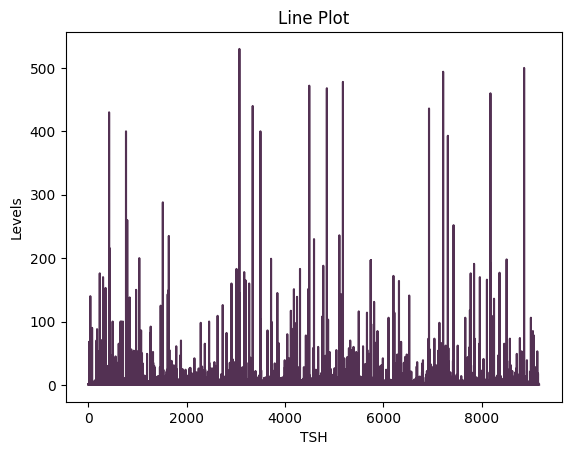

In [ ]:
# Line plot
plt.plot(data['TSH'],color="#533153")
plt.xlabel("TSH")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()

In [ ]:
target_dist = pd.DataFrame(data['target'].value_counts())
target_dist.reset_index(inplace=True)
target_dist.columns = ['target', 'count']
fig = px.pie(target_dist, names='target', values='count')
fig.update_traces(marker=dict(colors=["#BEE9E9", "#6C7B8B", "#3A506B"]))
fig.show()


In [ ]:
import plotly.express as px

fig = px.histogram(data, x="TSH", color="target", barmode="overlay",
                  color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'})

fig.update_layout(title_text='TSH Level by Diagnosis', yaxis_title='Count')
fig.update_traces(opacity=0.75)
fig.update_xaxes(range= [0,11])
fig.show()

**STEP 4: DATA NORMALISATION**

We need to use One Hot Encoder for converting strings to integers.
One Hot Encoding is used for Input Variables

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
feature_names = data.columns.tolist()

In [ ]:
feature_names

['age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'TBG',
 'target']

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
categorical_cols = [
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'TBG']
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' parameter removes one of the one-hot encoded columns to avoid multicollinearity
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data, encoded_cols], axis=1)
data.drop(categorical_cols, axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
data

,age,target,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_meds_t,sick_t,pregnant_t,thyroid_surgery_t,I131_treatment_t,...,TBG_100.0,TBG_106.0,TBG_108.0,TBG_110.0,TBG_114.0,TBG_116.0,TBG_135.0,TBG_190.0,TBG_200.0,TBG_nan
0,29.0,Negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,29.0,Negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41.0,Negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.0,Negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,Negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56.0,Negative,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9168,22.0,Negative,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9169,69.0,Negative,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9170,47.0,Negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


we can use Label encoder for output variables like target

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'target_column' is the name of your target variable column
target_column = 'target'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
data[target_column] = label_encoder.fit_transform(data[target_column])

Dataset after Normalisation

In [ ]:
data#checking

,age,target,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_meds_t,sick_t,pregnant_t,thyroid_surgery_t,I131_treatment_t,...,TBG_100.0,TBG_106.0,TBG_108.0,TBG_110.0,TBG_114.0,TBG_116.0,TBG_135.0,TBG_190.0,TBG_200.0,TBG_nan
0,29.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,29.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9168,22.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9169,69.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9170,47.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data["target"].value_counts()

2    8264
1     667
0     241
Name: target, dtype: int64

**STEP 5: TRAINING THE MODEL**

In [ ]:
x=data
y=data['target']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=89)

The accuracy of the Logistic Regression model is: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00       209
           2       1.00      1.00      1.00      2740

    accuracy                           1.00      3027
   macro avg       1.00      1.00      1.00      3027
weighted avg       1.00      1.00      1.00      3027



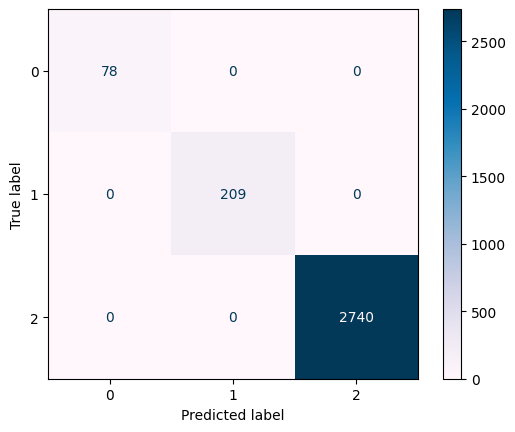

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Convert back to original labels for evaluation
predictions_original_labels = label_encoder.inverse_transform(predictions)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, predictions)
print('The accuracy of the Logistic Regression model is:', accuracy)

# Display the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
cmap = plt.cm.get_cmap('PuBu')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap =cmap)
plt.show()

In [ ]:
newdata['target'].value_counts()

Negative        6763
Hypothyroid      667
Hyperthyroid     241
Name: target, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train, X_test, Y_train, Y_test are your training and testing data

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to discrete classes (assuming a classification scenario)
predictions_classes = np.round(predictions).astype(int)

# Evaluate the model using accuracy (not typical for linear regression)
accuracy = accuracy_score(Y_test, predictions_classes)

print('Accuracy of Linear Regression model:', accuracy)

Accuracy of Linear Regression model: 1.0


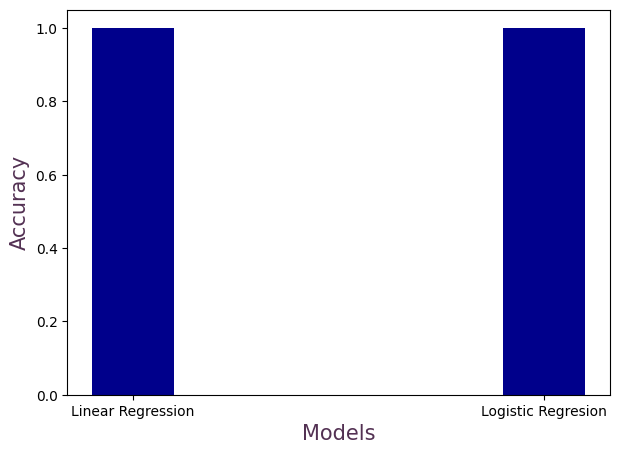

In [ ]:
fig = plt.figure(figsize = (7, 5))
models = ["Linear Regression", "Logistic Regresion"]
plt.bar(models, accuracy, width = 0.2, color='darkblue')
plt.xlabel("Models", fontsize = 15,color="#533153")
plt.ylabel("Accuracy", fontsize = 15,color="#533153")
plt.xticks()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Initialize and train the Logistic Regression model
model = SVC()
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Convert back to original labels for evaluation
predictions_original_labels = label_encoder.inverse_transform(predictions)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, predictions)
print('The accuracy of the svm model is:', accuracy)

# Display the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

The accuracy of the svm model is: 0.905186653452263
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.00      0.00      0.00       209
           2       0.91      1.00      0.95      2740

    accuracy                           0.91      3027
   macro avg       0.30      0.33      0.32      3027
weighted avg       0.82      0.91      0.86      3027

